In [1]:
%matplotlib inline

import sys
import os
sys.path.append("../../..")
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from osgeo import gdal
import osr
import my_packages.My_Geoprocess as mgp
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [2]:
os.listdir('../../Resultats/Bathymetries/S2A_MSIL1C_20180305T230901/')

['Stumpf_NoClass_Ridge_CoverPixRatio18.0%.qml',
 'Stumpf_NoClass_Ridge_CoverPixRatio18.0%.tif',
 'Stumpf_NoClass_Ridge_CoverPixRatio18.0%.tif.aux.xml']

(10980, 10980)


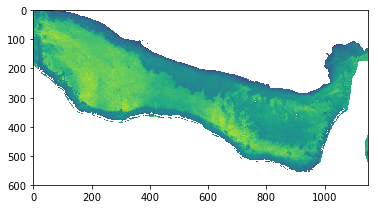

In [3]:
BathyResultsFolder = '../../Resultats/Bathymetries/S2A_MSIL1C_20180305T230901/'
BathyMapFile = 'Stumpf_NoClass_Ridge_CoverPixRatio18.0%.tif'

BathyMap = gdal.Open(BathyResultsFolder + BathyMapFile, gdal.GA_ReadOnly)
BathyMap = BathyMap.GetRasterBand(1).ReadAsArray()
print(BathyMap.shape)
plt.imshow(BathyMap[8800:9400,3500:4650])

In [ ]:
data=[go.Surface(z=(np.flip(BathyMap[9000:9400,4000:4550], axis=1)+1.37)*-1)]

layout=go.Layout(title='Bathymetries',
                 scene = dict(

                     aspectmode="data"
                     )
                )
fig=go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='elevations-3d-surface')

In [24]:
help(np.flip)

Help on function flip in module numpy.lib.function_base:

flip(m, axis)
    Reverse the order of elements in an array along the given axis.
    
    The shape of the array is preserved, but the elements are reordered.
    
    .. versionadded:: 1.12.0
    
    Parameters
    ----------
    m : array_like
        Input array.
    axis : integer
        Axis in array, which entries are reversed.
    
    
    Returns
    -------
    out : array_like
        A view of `m` with the entries of axis reversed.  Since a view is
        returned, this operation is done in constant time.
    
    See Also
    --------
    flipud : Flip an array vertically (axis=0).
    fliplr : Flip an array horizontally (axis=1).
    
    Notes
    -----
    flip(m, 0) is equivalent to flipud(m).
    flip(m, 1) is equivalent to fliplr(m).
    flip(m, n) corresponds to ``m[...,::-1,...]`` with ``::-1`` at position n.
    
    Examples
    --------
    >>> A = np.arange(8).reshape((2,2,2))
    >>> A
    array([[[